In [1]:
%matplotlib ipympl
import numpy as np
from pathlib import Path
import utils as utils
import harp
import matplotlib.pyplot as plt

In [2]:
root = Path('C:/Users/neurogears/source/repos/swc/hypnose/example_data/2025-01-21T14-24-20/2025-01-21T14-24-20')
# root = Path('C:/Users/neurogears/source/repos/swc/hypnose/example_data/2025-01-24T11-11-41')

In [3]:
metadata_reader = utils.SessionData()
session_settings = utils.load_json(metadata_reader, root/"SessionSettings")

print(session_settings.iloc[0]['metadata'].sequences)

[DotMap(rewardCondition1=[[{'command': 'OdorA', 'rewarded': True}]], rewardCondition2=[[{'command': 'OdorE', 'rewarded': True}]], enableTrialIndicator=True, presentationTime=0.8, interCommand='Purge', interCommandTime=0.2, repeatCount=20, maximumTime=1.0, responseTime=99999.0, resetOnReward=True, interTrialInterval=0.0, name='OdourDiscrimination', defaultCommand='Default', enableRewardLocationIndicator=True)]


                            DOPort0  DOPort1  DOPort2  SupplyPort0  \
Time                                                                 
1904-01-01 21:36:58.050496     True    False    False        False   
1904-01-01 22:16:11.493504    False    False     True        False   
1904-01-02 07:58:46.105504    False    False    False        False   
1904-01-02 07:58:46.109504     True    False    False        False   
1904-01-02 08:00:19.003488    False    False     True        False   
1904-01-02 08:01:54.593504    False    False    False        False   
1904-01-02 08:01:54.596480     True    False    False        False   
1904-01-02 09:33:39.280480    False     True    False        False   
1904-01-02 09:34:05.471488    False    False    False        False   
1904-01-02 09:34:05.474496     True    False    False        False   
1904-01-02 09:34:05.475488     True    False    False        False   
1904-01-02 10:04:06.713504    False     True    False        False   
1904-01-02 10:05:27.

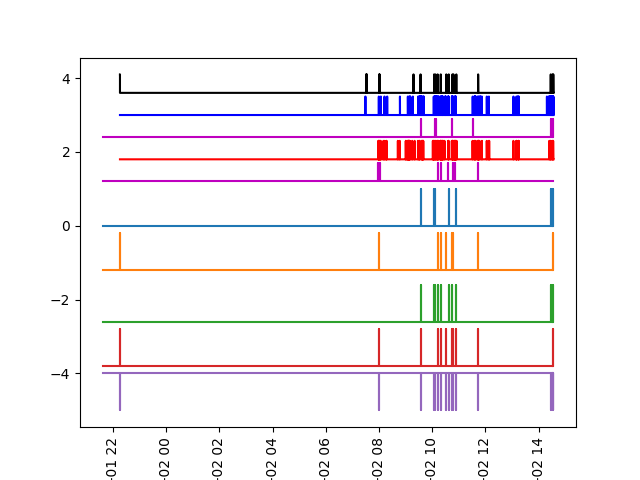

In [4]:
behavior_reader = harp.create_reader('device_schemas/behavior.yml', epoch=harp.REFERENCE_EPOCH)
olfactometer_reader = harp.create_reader('device_schemas/olfactometer.yml', epoch=harp.REFERENCE_EPOCH)

digital_input_data = utils.load(behavior_reader.DigitalInputState, root/"Behavior")
output_set = utils.load(behavior_reader.OutputSet, root/"Behavior")
olfactometer_valves_0 = utils.load(olfactometer_reader.OdorValveState, root/"Olfactometer0")
olfactometer_valves_1 = utils.load(olfactometer_reader.OdorValveState, root/"Olfactometer1")
olfactometer_end_0 = utils.load(olfactometer_reader.EndValveState, root/"Olfactometer0")

# plot olfactometer state
plt.figure()
plt.xticks(rotation=90)
plt.step(olfactometer_valves_0.index, olfactometer_valves_0['Valve0'] * 1, where='post')
plt.step(olfactometer_valves_1.index, olfactometer_valves_1['Valve0'] * 1 - 1.2, where='post')
plt.step(olfactometer_end_0.index, olfactometer_end_0['EndValve0'] * 1 - 2.6, where='post')
plt.step(olfactometer_end_0.index, olfactometer_end_0['EndValve1'] * 1 - 3.8, where='post')
plt.step(olfactometer_valves_1.index, olfactometer_valves_1['Valve3'] * 1 - 5.0, where='post')

# plot initation nose poke, reward pokes
plt.step(digital_input_data.index, digital_input_data['DIPort0'] * 0.5 + 3.6, where='post', c='k')
plt.step(digital_input_data.index, digital_input_data['DIPort1'] * 0.5 + 3.0, where='post', c='b')
plt.step(digital_input_data.index, digital_input_data['DIPort2'] * 0.5 + 1.8, where='post', c='r')

# plot reward initiations
print(output_set)
plt.step(output_set.index, output_set["SupplyPort1"] * 0.5 + 2.4, where='post', c='m')
plt.step(output_set.index, output_set["SupplyPort2"] * 0.5 + 1.2, where='post', c='m')
